In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("airline_2m.csv",encoding='Iso-8859-1', low_memory=False, nrows=1000000)
pd.set_option('display.max_columns', None)

In [3]:
df2 = data.loc[:, data.isnull().mean() < .9]

In [4]:
df2.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DivAirportLandings
0,1998,1,1,2,5,1998-01-02,NW,19386,NW,N297US,675,13487,1348701,31650,MSP,"Minneapolis, MN",MN,27.0,Minnesota,63,14869,1486902,34614,SLC,"Salt Lake City, UT",UT,49.0,Utah,87,1640,1659.0,19.0,19.0,1.0,1.0,1600-1659,24.0,1723.0,1856.0,3.0,1836,1859.0,23.0,23.0,1.0,1.0,1800-1859,0.0,0.0,176.0,180.0,153.0,1.0,991.0,4,NaN,NaN,NaN,NaN,NaN,NaN
1,2009,2,5,28,4,2009-05-28,FL,20437,FL,N946AT,671,13342,1334202,33342,MKE,"Milwaukee, WI",WI,55.0,Wisconsin,45,13204,1320401,31454,MCO,"Orlando, FL",FL,12.0,Florida,33,1204,1202.0,-2.0,0.0,0.0,-1.0,1200-1259,10.0,1212.0,1533.0,8.0,1541,1541.0,0.0,0.0,0.0,0.0,1500-1559,0.0,0.0,157.0,159.0,141.0,1.0,1066.0,5,NaN,NaN,NaN,NaN,NaN,0.0
2,2013,2,6,29,6,2013-06-29,MQ,20398,MQ,N665MQ,3297,11921,1192102,31921,GJT,"Grand Junction, CO",CO,8.0,Colorado,82,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48.0,Texas,74,1630,1644.0,14.0,14.0,0.0,0.0,1600-1659,9.0,1653.0,1936.0,6.0,1945,1942.0,-3.0,0.0,0.0,-1.0,1900-1959,0.0,0.0,135.0,118.0,103.0,1.0,773.0,4,NaN,NaN,NaN,NaN,NaN,0.0
3,2010,3,8,31,2,2010-08-31,DL,19790,DL,N6705Y,1806,12892,1289201,32575,LAX,"Los Angeles, CA",CA,6.0,California,91,11433,1143301,31295,DTW,"Detroit, MI",MI,26.0,Michigan,43,1305,1305.0,0.0,0.0,0.0,0.0,1300-1359,23.0,1328.0,2008.0,7.0,2035,2015.0,-20.0,0.0,0.0,-2.0,2000-2059,0.0,0.0,270.0,250.0,220.0,1.0,1979.0,8,NaN,NaN,NaN,NaN,NaN,0.0
4,2006,1,1,15,7,2006-01-15,US,20355,US,N504AU,465,11618,1161801,31703,EWR,"Newark, NJ",NJ,34.0,New Jersey,21,11057,1105702,31057,CLT,"Charlotte, NC",NC,37.0,North Carolina,36,1820,1911.0,51.0,51.0,1.0,3.0,1800-1859,19.0,1930.0,2050.0,8.0,2026,2058.0,32.0,32.0,1.0,2.0,2000-2059,0.0,0.0,126.0,107.0,80.0,1.0,529.0,3,0.0,0.0,0.0,0.0,32.0,NaN


In [5]:
df2.isnull().sum(axis=0)

Year                       0
Quarter                    0
Month                      0
DayofMonth                 0
DayOfWeek                  0
                       ...  
WeatherDelay          889064
NASDelay              889064
SecurityDelay         889064
LateAircraftDelay     889064
DivAirportLandings    627234
Length: 61, dtype: int64

In [6]:
df2=df2.dropna()

In [7]:
df2.isnull().sum(axis=0)

Year                  0
Quarter               0
Month                 0
DayofMonth            0
DayOfWeek             0
                     ..
WeatherDelay          0
NASDelay              0
SecurityDelay         0
LateAircraftDelay     0
DivAirportLandings    0
Length: 61, dtype: int64

In [8]:
df2=df2.drop(['FlightDate'], axis=1)

In [9]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df2["Reporting_Airline_code"] = lb_make.fit_transform(df2["Reporting_Airline"])

In [10]:
df2=df2.drop(['Reporting_Airline'], axis=1)

In [11]:
df2=df2.drop(['IATA_CODE_Reporting_Airline'], axis=1)

In [12]:
df2.loc[:, df2.dtypes == 'object'].head(1)

,Tail_Number,Origin,OriginCityName,OriginState,OriginStateName,Dest,DestCityName,DestState,DestStateName,DepTimeBlk,ArrTimeBlk
7,N927XJ,ATL,"Atlanta, GA",GA,Georgia,CAE,"Columbia, SC",SC,South Carolina,1900-1959,2000-2059


In [13]:
df2=df2.drop(['OriginCityName'], axis=1)
df2=df2.drop(['OriginStateName'], axis=1)
df2=df2.drop(['DestCityName'], axis=1)
df2=df2.drop(['DestStateName'], axis=1)
df2=df2.drop(['DepTimeBlk'], axis=1)
df2=df2.drop(['ArrTimeBlk'], axis=1)

In [14]:
lb_make = LabelEncoder()
df2["Origin"] = lb_make.fit_transform(df2["Origin"])
df2["OriginState"] = lb_make.fit_transform(df2["OriginState"])
df2["Dest"] = lb_make.fit_transform(df2["Dest"])
df2["DestState"] = lb_make.fit_transform(df2["DestState"])
df2[["Tail_Number"]].head(11)

,Tail_Number
7,N927XJ
9,N8688J
23,N933LR
24,N976SW
44,N631AW
45,N946WN
50,N488WN
82,N16919
114,N508MQ
128,N809AA


In [15]:
df2.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,DOT_ID_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginState,OriginStateFips,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestState,DestStateFips,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DivAirportLandings,Reporting_Airline_code
7,2019,2,6,11,2,20363,N927XJ,3459,10397,1039707,30397,20,8,13.0,34,10868,1086803,30868,58,40,45.0,37,1950,2331.0,221.0,221.0,1.0,12.0,19.0,2350.0,25.0,6.0,2057,31.0,214.0,214.0,1.0,12.0,0.0,0.0,67.0,60.0,35.0,1.0,192.0,1,0.0,0.0,0.0,0.0,214.0,0.0,0
9,2018,1,2,8,4,19393,N8688J,5932,13232,1323202,30977,209,12,17.0,41,11259,1125903,30194,88,44,48.0,74,2030,2046.0,16.0,16.0,1.0,1.0,34.0,2120.0,2314.0,5.0,2250,2319.0,29.0,29.0,1.0,1.0,0.0,0.0,140.0,153.0,114.0,1.0,793.0,4,0.0,0.0,13.0,0.0,16.0,0.0,19
23,2020,1,3,24,2,20378,N933LR,5825,14107,1410702,30466,259,3,4.0,81,12954,1295407,32575,197,4,6.0,91,1858,1950.0,52.0,52.0,1.0,3.0,9.0,1959.0,2101.0,4.0,2021,2105.0,44.0,44.0,1.0,2.0,0.0,0.0,83.0,75.0,62.0,1.0,355.0,2,44.0,0.0,0.0,0.0,0.0,0.0,21
24,2010,3,8,20,5,20304,N976SW,6582,10800,1080002,32575,55,4,6.0,91,14771,1477101,32457,307,4,6.0,91,1342,1352.0,10.0,10.0,0.0,0.0,20.0,1412.0,1505.0,5.0,1453,1510.0,17.0,17.0,1.0,1.0,0.0,0.0,71.0,78.0,53.0,1.0,326.0,2,9.0,0.0,7.0,0.0,1.0,0.0,15
44,2012,3,7,25,3,20355,N631AW,261,13487,1348702,31650,231,21,27.0,63,14107,1410702,30466,262,3,4.0,81,1755,1833.0,38.0,38.0,1.0,2.0,13.0,1846.0,1931.0,5.0,1914,1936.0,22.0,22.0,1.0,1.0,0.0,0.0,199.0,183.0,165.0,1.0,1276.0,6,1.0,0.0,0.0,0.0,21.0,0.0,17


In [16]:
cor = df2.corr()

In [17]:
#Correlation with output variable
cor_target = abs(cor["ArrDelayMinutes"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

DepDelay                0.963113
DepDelayMinutes         0.964837
DepDel15                0.263786
DepartureDelayGroups    0.776467
ArrDelay                1.000000
ArrDelayMinutes         1.000000
ArrivalDelayGroups      0.836852
CarrierDelay            0.639901
WeatherDelay            0.297657
NASDelay                0.254208
LateAircraftDelay       0.482578
Name: ArrDelayMinutes, dtype: float64

In [18]:
X = df2[['DepDelayMinutes','DepartureDelayGroups', 'ArrivalDelayGroups', 'CarrierDelay']]
y = df2['ArrDelayMinutes']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [20]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [21]:
y_pred = regressor.predict(X_test)


In [22]:
y_pred

array([20.41121495, 38.75      , 19.98324022, ..., 39.4       ,
       19.96311356, 81.39473684])

In [23]:
y_test

790843    15.0
637725    34.0
988956    19.0
521119    26.0
425060    40.0
          ... 
351507    16.0
203811    35.0
435427    41.0
49824     19.0
185311    75.0
Name: ArrDelayMinutes, Length: 20686, dtype: float64

In [24]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
r2_score(y_test, y_pred)


0.9907923393639565

In [25]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

6.821916033186701


In [26]:
mean_absolute_error(y_test,y_pred)

3.94060691387994

In [27]:
from sklearn import metrics

In [28]:
print("MSE for DTReg (All features): " , np.round(metrics.mean_squared_error(y_test, y_pred), 2))
print("MAE for DTReg (All features): " , np.round(metrics.mean_absolute_error(y_test, y_pred), 2))
print("RSquared for DTReg (All features): " , np.round(metrics.r2_score(y_test, y_pred), 2))



MSE for DTReg (All features):  46.54
MAE for DTReg (All features):  3.94
RSquared for DTReg (All features):  0.99


In [29]:
import pydotplus
from sklearn import tree

In [30]:
import graphviz 
from graphviz import Source

In [31]:
dot_data = tree.export_graphviz(regressor, out_file=None)
# using the graph_from_dot_data to visualize the tree formed by the regressor
graph = pydotplus.graph_from_dot_data(dot_data)
#graph.write_pdf("tree.pdf")

[Text(225.78504673213217, 214.57894736842104, 'X[2] <= 8.5\nmse = 4788.297\nsamples = 48265\nvalue = 59.669'),
 Text(133.68542474119857, 208.85684210526315, 'X[2] <= 3.5\nmse = 836.917\nsamples = 44073\nvalue = 44.251'),
 Text(64.61434205770828, 203.13473684210527, 'X[2] <= 1.5\nmse = 150.451\nsamples = 33362\nvalue = 30.158'),
 Text(29.055724031219707, 197.41263157894736, 'X[3] <= 22.5\nmse = 18.107\nsamples = 18766\nvalue = 20.967'),
 Text(20.197844108321895, 191.69052631578947, 'X[0] <= 27.5\nmse = 17.265\nsamples = 17665\nvalue = 20.648'),
 Text(12.651415927035472, 185.96842105263158, 'X[3] <= 19.5\nmse = 16.209\nsamples = 13852\nvalue = 20.168'),
 Text(10.12245185274141, 180.24631578947367, 'X[3] <= 14.5\nmse = 16.312\nsamples = 13414\nvalue = 20.089'),
 Text(7.061748335651837, 174.52421052631578, 'X[0] <= 22.5\nmse = 16.513\nsamples = 12032\nvalue = 20.183'),
 Text(3.5045946800756522, 168.8021052631579, 'X[3] <= 0.5\nmse = 16.293\nsamples = 10460\nvalue = 20.045'),
 Text(0.559664

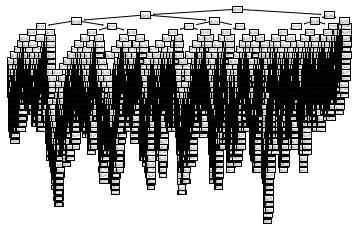

In [33]:
tree.plot_tree(regressor)